In [52]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [53]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [54]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [55]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [56]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [57]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [58]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [59]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [60]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [61]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [62]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [63]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [64]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [65]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [66]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [67]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [68]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [69]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [70]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [71]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [72]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [73]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [74]:
# Function to add difference features to the dataset
def add_difference_features(df):
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        df[f'Deberta_Roberta_{label}_diff'] = abs(df[f'Deberta_{label}'] - df[f'Roberta_{label}'])
        df[f'Deberta_Albert_{label}_diff'] = abs(df[f'Deberta_{label}'] - df[f'Albert_{label}'])
        df[f'Roberta_Albert_{label}_diff'] = abs(df[f'Roberta_{label}'] - df[f'Albert_{label}'])
    return df

# Apply this function to each dataset
combined_snli_df = add_difference_features(combined_snli_df)
combined_mnli_matched_df = add_difference_features(combined_mnli_matched_df)
combined_mnli_mismatched_df = add_difference_features(combined_mnli_mismatched_df)
combined_anli_r1_df = add_difference_features(combined_anli_r1_df)
combined_anli_r2_df = add_difference_features(combined_anli_r2_df)
combined_anli_r3_df = add_difference_features(combined_anli_r3_df)


In [75]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,Deberta_Roberta_Entailment_diff,Deberta_Albert_Entailment_diff,Roberta_Albert_Entailment_diff,Deberta_Roberta_Neutral_diff,Deberta_Albert_Neutral_diff,Roberta_Albert_Neutral_diff,Deberta_Roberta_Contradiction_diff,Deberta_Albert_Contradiction_diff,Roberta_Albert_Contradiction_diff
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1,0.012681,0.005680,0.007000,0.043117,0.010352,0.032766,0.030437,0.004671,0.025766
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2,0.997740,0.993764,0.003975,0.001504,0.007010,0.005505,0.996236,0.986755,0.009481
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0,0.953792,0.852873,0.100919,0.002543,0.098691,0.101234,0.951249,0.951564,0.000315
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2,0.994622,0.990837,0.003785,0.001297,0.065949,0.067246,0.995919,0.924888,0.071031
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2,0.999579,0.995794,0.003785,0.000277,0.029042,0.028765,0.999302,0.966752,0.032550


In [76]:
from sklearn.model_selection import train_test_split

# Function to split data
def split_data(df):
    X = df.drop(columns=['True_Label'])  # Features
    y = df['True_Label']                 # Labels
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val

# Split data for each dataset
X_train_snli, X_val_snli, y_train_snli, y_val_snli = split_data(combined_snli_df)
X_train_mnli_matched, X_val_mnli_matched, y_train_mnli_matched, y_val_mnli_matched = split_data(combined_mnli_matched_df)
X_train_mnli_mismatched, X_val_mnli_mismatched, y_train_mnli_mismatched, y_val_mnli_mismatched = split_data(combined_mnli_mismatched_df)
X_train_anli_r1, X_val_anli_r1, y_train_anli_r1, y_val_anli_r1 = split_data(combined_anli_r1_df)
X_train_anli_r2, X_val_anli_r2, y_train_anli_r2, y_val_anli_r2 = split_data(combined_anli_r2_df)
X_train_anli_r3, X_val_anli_r3, y_train_anli_r3, y_val_anli_r3 = split_data(combined_anli_r3_df)


In [77]:
X_train_mnli_matched

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,Deberta_Roberta_Entailment_diff,Deberta_Albert_Entailment_diff,Roberta_Albert_Entailment_diff,Deberta_Roberta_Neutral_diff,Deberta_Albert_Neutral_diff,Roberta_Albert_Neutral_diff,Deberta_Roberta_Contradiction_diff,Deberta_Albert_Contradiction_diff,Roberta_Albert_Contradiction_diff
1672,0.998960,0.000485,0.000555,0.001178,0.058175,0.940648,0.002565,0.012469,0.984965,0.997782,0.996394,0.001388,0.057689,0.011984,0.045705,0.940093,0.984410,0.044317
7383,0.000280,0.003708,0.996011,0.963184,0.035134,0.001683,0.830383,0.167441,0.002176,0.962903,0.830103,0.132801,0.031425,0.163733,0.132308,0.994329,0.993836,0.000493
7825,0.995251,0.002183,0.002566,0.004226,0.006285,0.989489,0.008342,0.003635,0.988023,0.991025,0.986909,0.004116,0.004102,0.001453,0.002650,0.986923,0.985457,0.001466
6784,0.000494,0.008504,0.991003,0.997151,0.002360,0.000489,0.986155,0.013108,0.000736,0.996657,0.985661,0.010996,0.006144,0.004605,0.010749,0.990513,0.990266,0.000247
5328,0.701676,0.237751,0.060573,0.020482,0.038785,0.940733,0.123899,0.145232,0.730869,0.681194,0.577777,0.103417,0.198966,0.092519,0.106447,0.880160,0.670296,0.209864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.001678,0.735655,0.262667,0.154772,0.807297,0.037931,0.178774,0.804987,0.016240,0.153094,0.177096,0.024002,0.071642,0.069332,0.002310,0.224736,0.246428,0.021692
5191,0.989200,0.003094,0.007706,0.000496,0.001119,0.998385,0.004160,0.003519,0.992321,0.988704,0.985040,0.003664,0.001975,0.000425,0.002400,0.990679,0.984615,0.006064
5390,0.002120,0.128626,0.869254,0.895957,0.101495,0.002547,0.871351,0.115298,0.013351,0.893837,0.869230,0.024607,0.027131,0.013328,0.013803,0.866706,0.855903,0.010804
860,0.997554,0.002238,0.000208,0.000236,0.002361,0.997403,0.000912,0.004808,0.994281,0.997318,0.996642,0.000675,0.000123,0.002569,0.002447,0.997195,0.994073,0.003122


In [78]:
y_train_mnli_matched

1672    2
7383    0
7825    2
6784    0
5328    2
       ..
5734    1
5191    2
5390    0
860     2
7270    0
Name: True_Label, Length: 7852, dtype: int64

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from joblib import dump

def train_simple_logistic_regression(X_train, y_train, X_val, y_val, C=1.0, penalty='l2', solver='saga', max_iter=100):
    # Initialize and train the Logistic Regression model
    log_reg = LogisticRegression(C=C, penalty=penalty, multi_class='multinomial', solver=solver, max_iter=max_iter)
    log_reg.fit(X_train, y_train)

    # Evaluate the model
    y_val_pred = log_reg.predict(X_val)
    y_val_prob = log_reg.predict_proba(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    loss = log_loss(y_val, y_val_prob)
    report = classification_report(y_val, y_val_pred)

    print("Accuracy:", accuracy)
    print("Logistic Loss:", loss)
    print("Classification Report:\n", report)

    # History or results dictionary
    history = {
        'accuracy': accuracy,
        'log_loss': loss,
        'classification_report': report
    }

    return log_reg, history

In [141]:
# Assuming X_train_snli, y_train_snli, X_val_snli, y_val_snli are already defined
log_reg_snli, history_snli = train_simple_logistic_regression(
    X_train_snli, y_train_snli, X_val_snli, y_val_snli, 
    C=0.1, solver='saga', max_iter=100
)


Accuracy: 0.9318066157760814
Logistic Loss: 0.2133851250589656
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       691
         1.0       0.88      0.91      0.90       608
         2.0       0.97      0.94      0.96       666

    accuracy                           0.93      1965
   macro avg       0.93      0.93      0.93      1965
weighted avg       0.93      0.93      0.93      1965



In [142]:
# Assuming X_train_mnli_matched, y_train_mnli_matched, X_val_mnli_matched, y_val_mnli_matched are defined
log_reg_mnli_matched, history_mnli_matched = train_simple_logistic_regression(
    X_train_mnli_matched, y_train_mnli_matched, X_val_mnli_matched, y_val_mnli_matched, 
    C=0.1, solver='saga', max_iter=100
)


Accuracy: 0.9240957717778909
Logistic Loss: 0.22447464500576933
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       658
           1       0.89      0.90      0.89       651
           2       0.95      0.94      0.95       654

    accuracy                           0.92      1963
   macro avg       0.92      0.92      0.92      1963
weighted avg       0.92      0.92      0.92      1963



In [143]:
# Assuming X_train_mnli_mismatched, y_train_mnli_mismatched, X_val_mnli_mismatched, y_val_mnli_mismatched are defined
log_reg_mnli_mismatched, history_mnli_mismatched = train_simple_logistic_regression(
    X_train_mnli_mismatched, y_train_mnli_mismatched, X_val_mnli_mismatched, y_val_mnli_mismatched, 
    C=0.1, solver='saga', max_iter=100
)


Accuracy: 0.9166243009659379
Logistic Loss: 0.25204500560358445
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       689
           1       0.86      0.90      0.88       632
           2       0.95      0.93      0.94       646

    accuracy                           0.92      1967
   macro avg       0.92      0.92      0.92      1967
weighted avg       0.92      0.92      0.92      1967



In [144]:
# Assuming X_train_anli_r1, y_train_anli_r1, X_val_anli_r1, y_val_anli_r1 are defined
log_reg_anli_r1, history_anli_r1 = train_simple_logistic_regression(
    X_train_anli_r1, y_train_anli_r1, X_val_anli_r1, y_val_anli_r1,
    C=0.1, solver='saga', max_iter=100
)


Accuracy: 0.72
Logistic Loss: 0.7111694169458042
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70        62
           1       0.66      0.76      0.70        66
           2       0.82      0.69      0.75        72

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



In [145]:
# Assuming X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2 are defined
log_reg_anli_r2, history_anli_r2 = train_simple_logistic_regression(
    X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2,
    C=0.1, solver='saga', max_iter=100
)


Accuracy: 0.735
Logistic Loss: 0.7303625824254846
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        66
           1       0.69      0.75      0.72        72
           2       0.81      0.71      0.76        62

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.74      0.73      0.74       200



In [84]:
# ANLI Round 2
model_anli_r2, params_anli_r2, metrics_anli_r2 = train_simple_logistic_regression(
    X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2, C=0.1, penalty='l2', solver='saga')


Parameters used: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Accuracy of Logistic Regression: 0.735
Logistic Loss: 0.7303595727372987
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        66
           1       0.69      0.75      0.72        72
           2       0.81      0.71      0.76        62

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.74      0.73      0.74       200



In [146]:
# Assuming X_train_anli_r3, y_train_anli_r3, X_val_anli_r3, y_val_anli_r3 are defined
log_reg_anli_r3, history_anli_r3 = train_simple_logistic_regression(
    X_train_anli_r3, y_train_anli_r3, X_val_anli_r3, y_val_anli_r3,
    C=0.1, solver='saga', max_iter=100
)


Accuracy: 0.6875
Logistic Loss: 0.6830118189806907
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        75
           1       0.59      0.51      0.55        76
           2       0.75      0.82      0.78        89

    accuracy                           0.69       240
   macro avg       0.68      0.68      0.68       240
weighted avg       0.68      0.69      0.68       240



In [148]:
# Concatenate training data and labels
X_train_combined = pd.concat([X_train_snli, X_train_mnli_matched, X_train_mnli_mismatched,
                               X_train_anli_r1, X_train_anli_r2, X_train_anli_r3], ignore_index=True)
y_train_combined = pd.concat([y_train_snli, y_train_mnli_matched, y_train_mnli_mismatched,
                               y_train_anli_r1, y_train_anli_r2, y_train_anli_r3], ignore_index=True)

# Concatenate validation data and labels
X_val_combined = pd.concat([X_val_snli, X_val_mnli_matched, X_val_mnli_mismatched,
                             X_val_anli_r1, X_val_anli_r2, X_val_anli_r3], ignore_index=True)
y_val_combined = pd.concat([y_val_snli, y_val_mnli_matched, y_val_mnli_mismatched,
                             y_val_anli_r1, y_val_anli_r2, y_val_anli_r3], ignore_index=True)

# Train the logistic regression model on the combined dataset
log_reg_combined, history_combined = train_simple_logistic_regression(
    X_train_combined, y_train_combined, X_val_combined, y_val_combined,
    C=0.1, solver='saga', max_iter=100
)


Accuracy: 0.9005355776587605
Logistic Loss: 0.2919782078971931
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2241
         1.0       0.85      0.88      0.86      2105
         2.0       0.94      0.92      0.93      2189

    accuracy                           0.90      6535
   macro avg       0.90      0.90      0.90      6535
weighted avg       0.90      0.90      0.90      6535



In [150]:
from joblib import dump


# Save the trained model to a file
model_filename = 'logistic_regression_feature_ensemble.joblib'
dump(log_reg_combined, model_filename)
print(f"Model saved to {model_filename}")

Model saved to logistic_regression_feature_ensemble.joblib


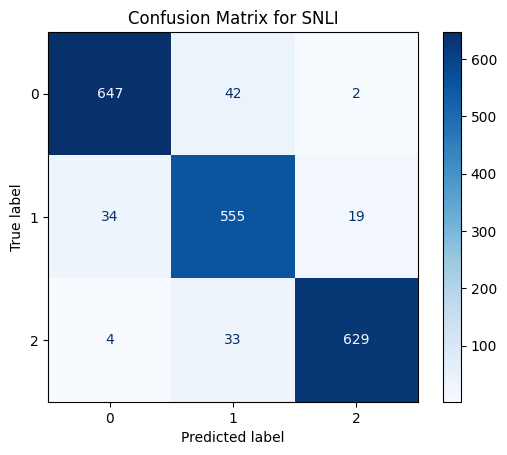

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Assuming y_val_snli and predictions from the model log_reg_snli
y_pred_snli = log_reg_snli.predict(X_val_snli)
plot_confusion_matrix(y_val_snli, y_pred_snli, title="Confusion Matrix for SNLI")


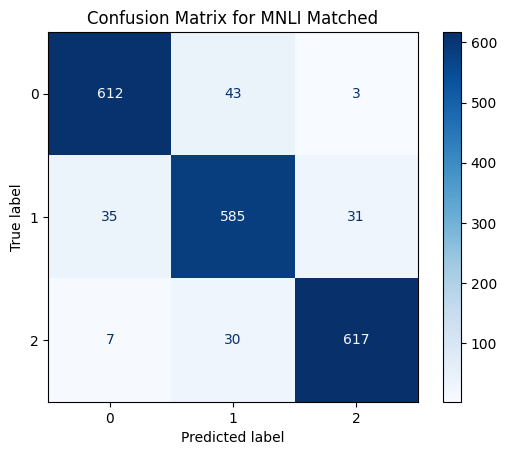

In [153]:
y_pred_mnli_matched = log_reg_mnli_matched.predict(X_val_mnli_matched)
plot_confusion_matrix(y_val_mnli_matched, y_pred_mnli_matched, title="Confusion Matrix for MNLI Matched")


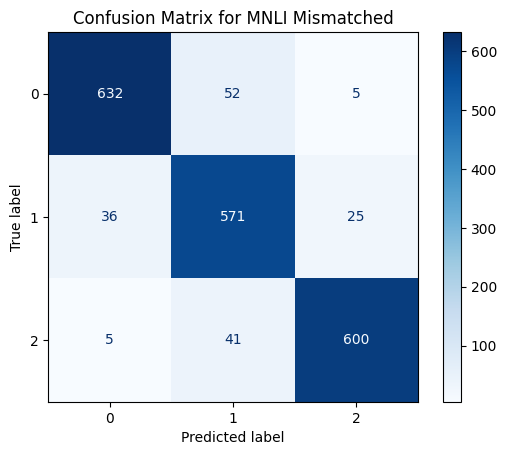

In [154]:
y_pred_mnli_mismatched = log_reg_mnli_mismatched.predict(X_val_mnli_mismatched)
plot_confusion_matrix(y_val_mnli_mismatched, y_pred_mnli_mismatched, title="Confusion Matrix for MNLI Mismatched")


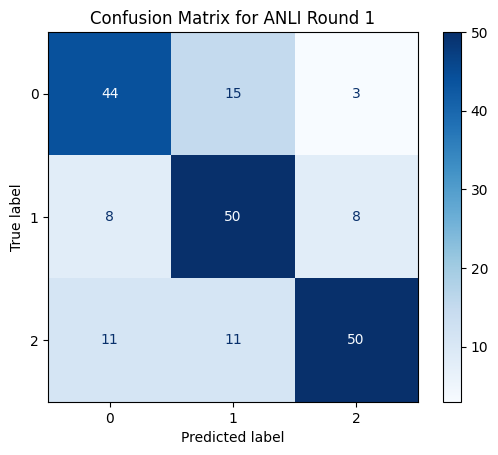

In [155]:
y_pred_anli_r1 = log_reg_anli_r1.predict(X_val_anli_r1)
plot_confusion_matrix(y_val_anli_r1, y_pred_anli_r1, title="Confusion Matrix for ANLI Round 1")


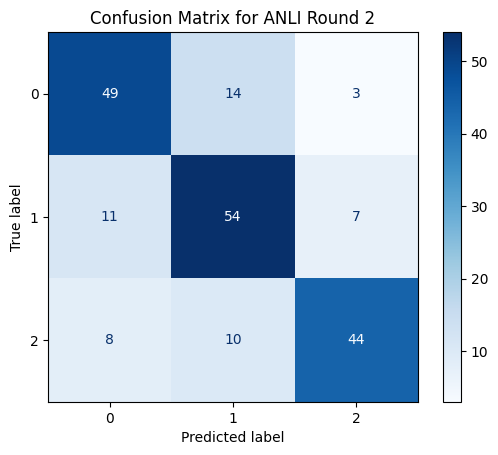

In [156]:
y_pred_anli_r2 = log_reg_anli_r2.predict(X_val_anli_r2)
plot_confusion_matrix(y_val_anli_r2, y_pred_anli_r2, title="Confusion Matrix for ANLI Round 2")


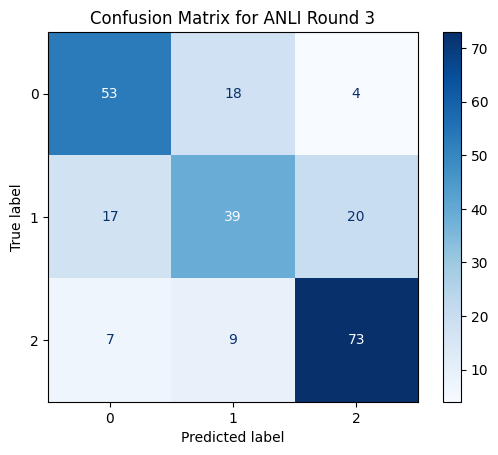

In [157]:
y_pred_anli_r3 = log_reg_anli_r3.predict(X_val_anli_r3)
plot_confusion_matrix(y_val_anli_r3, y_pred_anli_r3, title="Confusion Matrix for ANLI Round 3")


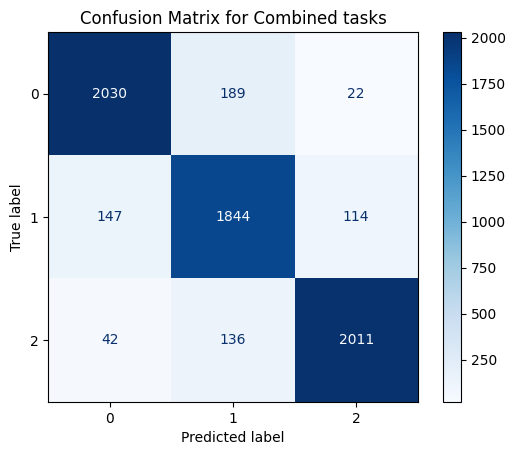

In [158]:
y_pred_combined = log_reg_combined.predict(X_val_combined)
plot_confusion_matrix(y_val_combined, y_pred_combined, title="Confusion Matrix for Combined tasks")


In [112]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, log_loss
from tqdm import tqdm
from xgboost.callback import TrainingCallback

class ProgressCallback(TrainingCallback):
    def __init__(self, n_estimators):
        super().__init__()
        self.progress_bar = tqdm(total=n_estimators, desc='XGBoost Training Progress')

    def after_iteration(self, model, epoch, evals_log):
        self.progress_bar.update(1)
        return False  # Return False to continue training

    def after_training(self, model):
        self.progress_bar.close()
        return model

def train_xgboost(X_train, y_train, X_val, y_val, num_classes=3, learning_rate=0.01, max_depth=7, n_estimators=500, early_stopping_rounds=50, subsample=0.7, colsample_bytree=0.7, min_child_weight=1, reg_alpha=0.05, reg_lambda=0.5):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    params = {
        'objective': 'multi:softprob',
        'num_class': num_classes,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'min_child_weight': min_child_weight,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'eval_metric': ['mlogloss', 'merror'],
        'verbosity': 0
    }

    evals_result = {}
    evals = [(dtrain, 'train'), (dval, 'val')]
    model = xgb.train(params, dtrain, num_boost_round=n_estimators, early_stopping_rounds=early_stopping_rounds,
                      evals=evals, evals_result=evals_result, verbose_eval=False, callbacks=[ProgressCallback(n_estimators)])

    y_val_pred = model.predict(dval).argmax(axis=1)
    y_val_prob = model.predict(dval)
    accuracy = accuracy_score(y_val, y_val_pred)
    loss = log_loss(y_val, y_val_prob)
    report = classification_report(y_val, y_val_pred)

    print(f"Best Iteration: {model.best_iteration}")
    print(f"Accuracy of XGBoost: {accuracy}")
    print(f"Logistic Loss: {loss}")
    print("Classification Report:\n", report)

    return model, evals_result


In [113]:
# Training for SNLI
model_snli, history_snli = train_xgboost(X_train_snli, y_train_snli, X_val_snli, y_val_snli)



XGBoost Training Progress:  15%|█▍        | 73/500 [00:00<00:05, 83.18it/s]

Best Iteration: 23
Accuracy of XGBoost: 0.9287531806615776
Logistic Loss: 0.54887002852792
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       691
         1.0       0.89      0.89      0.89       608
         2.0       0.96      0.95      0.96       666

    accuracy                           0.93      1965
   macro avg       0.93      0.93      0.93      1965
weighted avg       0.93      0.93      0.93      1965



In [114]:
# Training for MNLI Matched
model_mnli_matched, history_mnli_matched = train_xgboost(X_train_mnli_matched, y_train_mnli_matched, X_val_mnli_matched, y_val_mnli_matched)



XGBoost Training Progress:  21%|██        | 106/500 [00:01<00:05, 71.58it/s]

Best Iteration: 56
Accuracy of XGBoost: 0.9230769230769231
Logistic Loss: 0.4529035576704575
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       658
           1       0.90      0.88      0.89       651
           2       0.94      0.95      0.95       654

    accuracy                           0.92      1963
   macro avg       0.92      0.92      0.92      1963
weighted avg       0.92      0.92      0.92      1963



In [115]:
# Training for MNLI Mismatched
model_mnli_mismatched, history_mnli_mismatched = train_xgboost(X_train_mnli_mismatched, y_train_mnli_mismatched, X_val_mnli_mismatched, y_val_mnli_mismatched)



XGBoost Training Progress:  18%|█▊        | 92/500 [00:01<00:05, 77.62it/s]


Best Iteration: 41
Accuracy of XGBoost: 0.9150991357397051
Logistic Loss: 0.5075479436487259
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       689
           1       0.86      0.90      0.88       632
           2       0.95      0.93      0.94       646

    accuracy                           0.92      1967
   macro avg       0.92      0.92      0.92      1967
weighted avg       0.92      0.92      0.92      1967



In [116]:
# Training for ANLI Round 1
model_anli_r1, history_anli_r1 = train_xgboost(X_train_anli_r1, y_train_anli_r1, X_val_anli_r1, y_val_anli_r1)



XGBoost Training Progress:  10%|█         | 52/500 [00:00<00:03, 136.28it/s]


Best Iteration: 1
Accuracy of XGBoost: 0.675
Logistic Loss: 0.8737436092183615
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.71      0.65        62
           1       0.63      0.61      0.62        66
           2       0.80      0.71      0.75        72

    accuracy                           0.68       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.68      0.68       200



In [117]:
# Training for ANLI Round 2
model_anli_r2, history_anli_r2 = train_xgboost(X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2)



XGBoost Training Progress:  14%|█▎        | 68/500 [00:00<00:03, 127.62it/s]

Best Iteration: 17
Accuracy of XGBoost: 0.685
Logistic Loss: 0.8673130882537111
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.67        66
           1       0.64      0.68      0.66        72
           2       0.78      0.69      0.74        62

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



In [118]:
# Training for ANLI Round 3
model_anli_r3, history_anli_r3 = train_xgboost(X_train_anli_r3, y_train_anli_r3, X_val_anli_r3, y_val_anli_r3)


XGBoost Training Progress:  15%|█▌        | 75/500 [00:00<00:03, 123.23it/s]


Best Iteration: 24
Accuracy of XGBoost: 0.7333333333333333
Logistic Loss: 0.8251911453664368
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78        75
           1       0.66      0.59      0.62        76
           2       0.78      0.79      0.78        89

    accuracy                           0.73       240
   macro avg       0.73      0.73      0.73       240
weighted avg       0.73      0.73      0.73       240



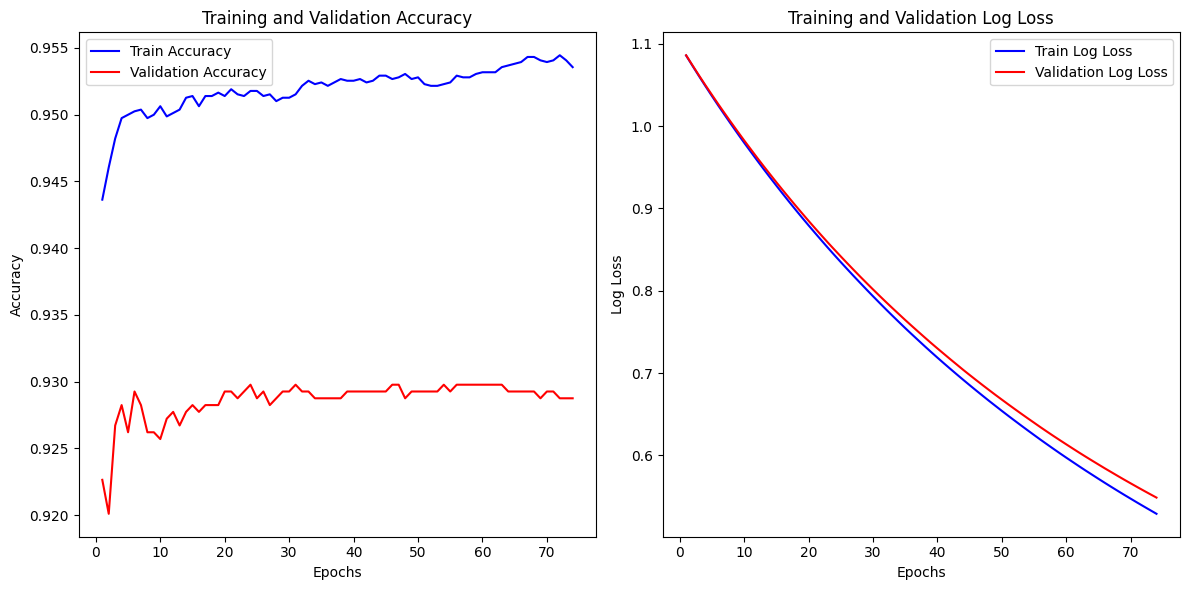

In [125]:
import matplotlib.pyplot as plt

def plot_xgboost_history(evals_result):
    # Extract metrics
    train_mlogloss = evals_result['train']['mlogloss']
    val_mlogloss = evals_result['val']['mlogloss']
    train_merror = evals_result['train']['merror']
    val_merror = evals_result['val']['merror']

    epochs = range(1, len(train_mlogloss) + 1)

    plt.figure(figsize=(12, 6))

    # Plot accuracy first (1 - merror)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, [1 - x for x in train_merror], 'b-', label='Train Accuracy')
    plt.plot(epochs, [1 - x for x in val_merror], 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot log loss second
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_mlogloss, 'b-', label='Train Log Loss')
    plt.plot(epochs, val_mlogloss, 'r-', label='Validation Log Loss')
    plt.title('Training and Validation Log Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
# Assuming 'history_snli' is obtained from training an XGBoost model on the SNLI dataset
plot_xgboost_history(history_snli)


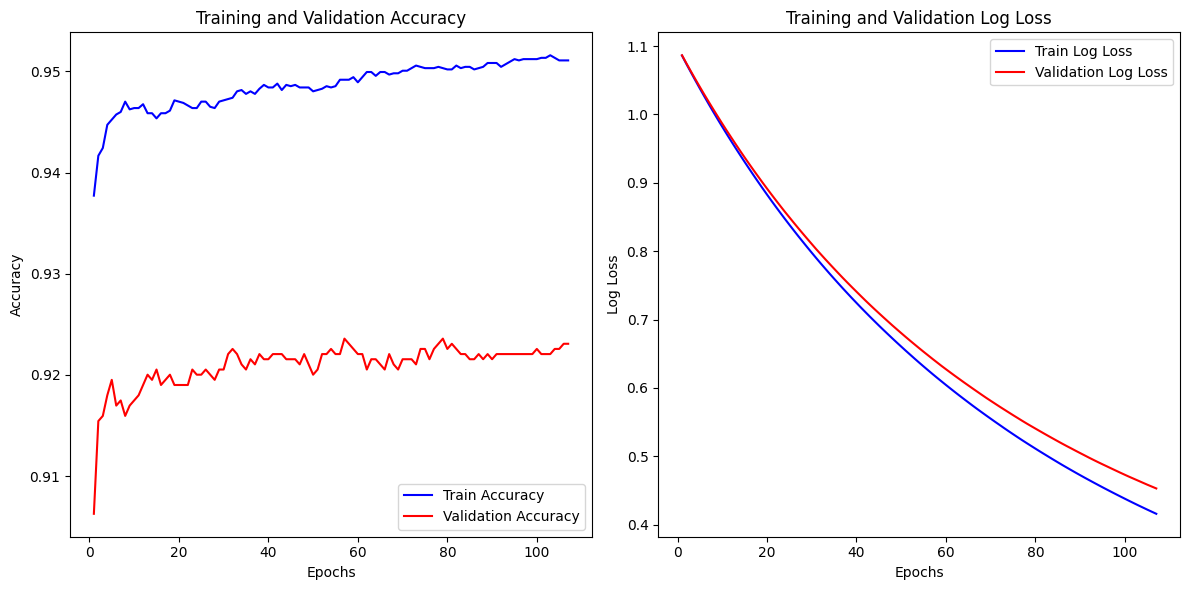

In [126]:

plot_xgboost_history(history_mnli_matched)


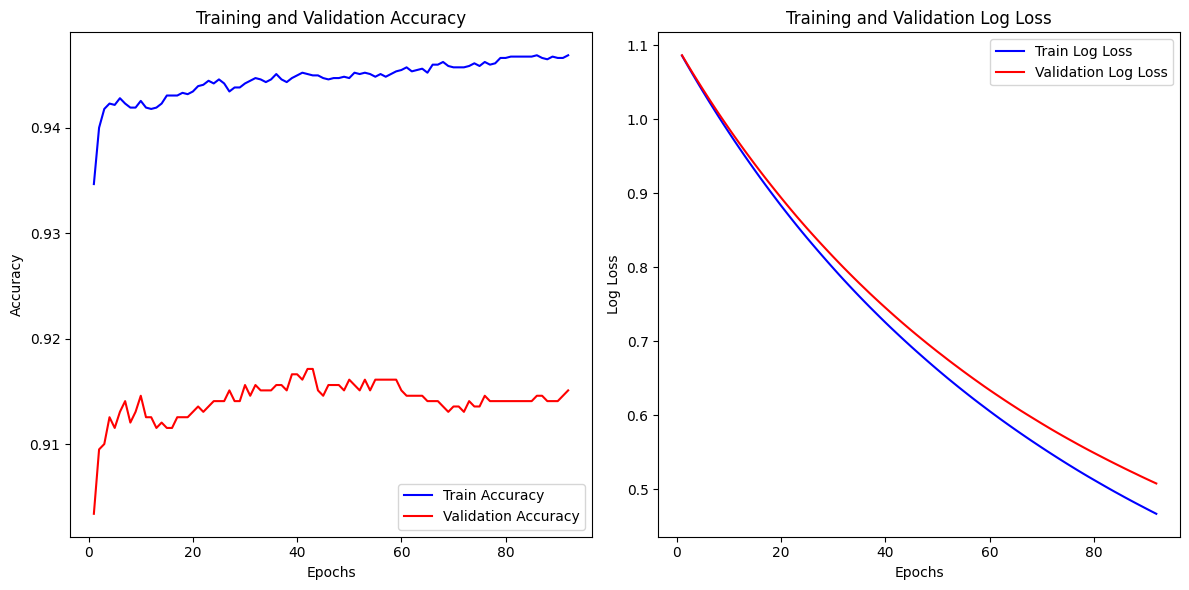

In [127]:

plot_xgboost_history(history_mnli_mismatched)


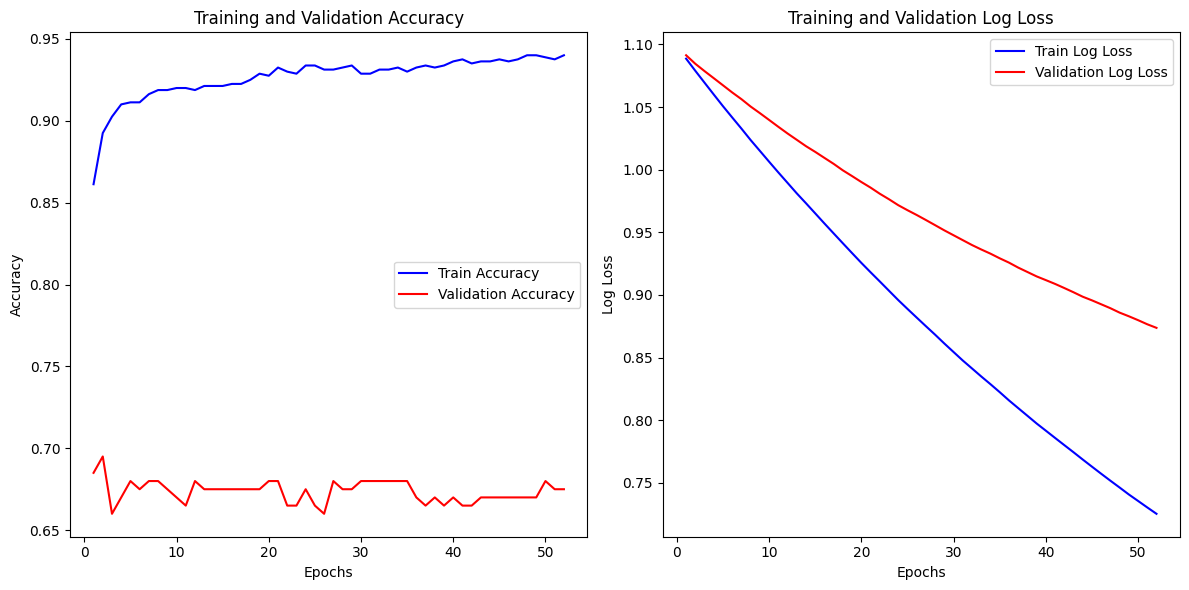

In [128]:
plot_xgboost_history(history_anli_r1)


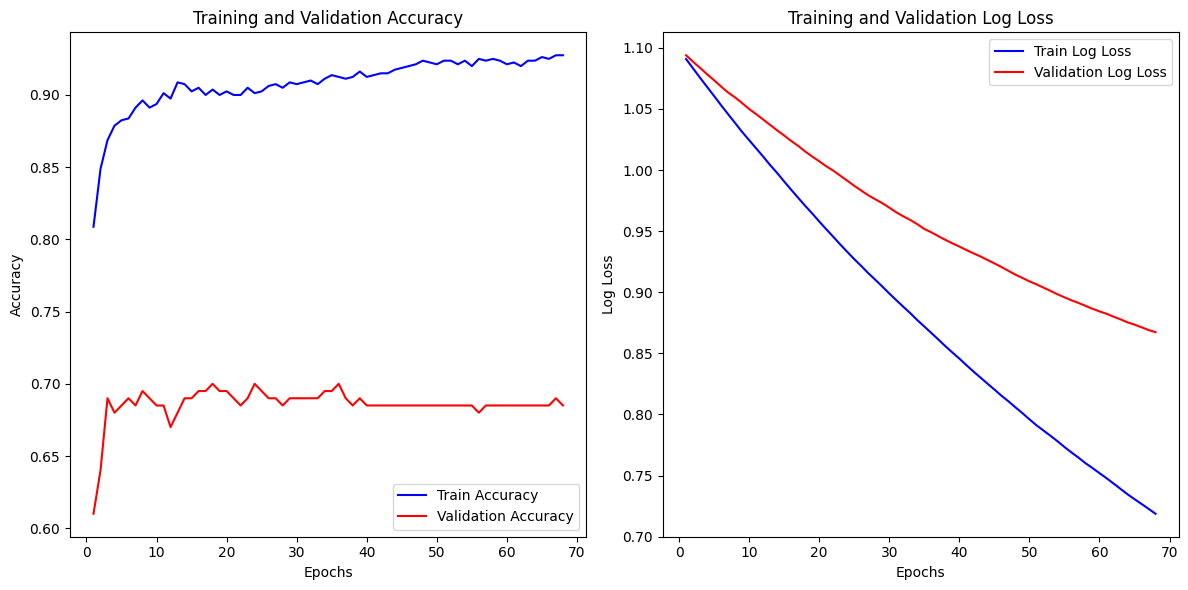

In [129]:
plot_xgboost_history(history_anli_r2)

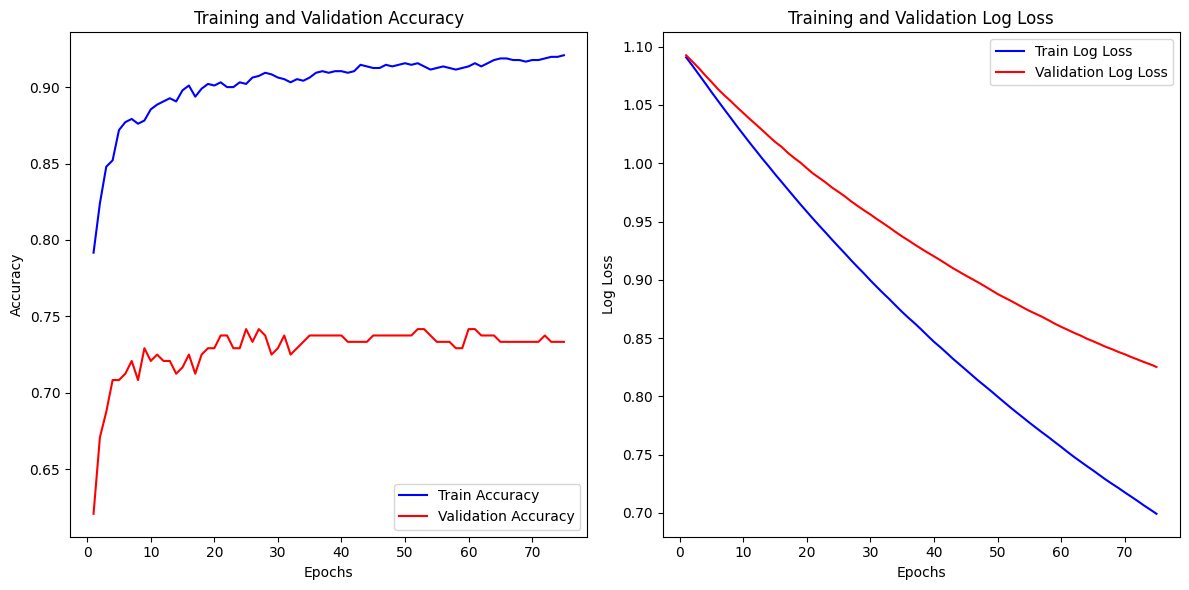

In [130]:
plot_xgboost_history(history_anli_r3)

In [134]:
# Train and evaluate on the combined dataset with tightened hyperparameters
model_combined, history_combined = train_xgboost(
    X_train_combined, y_train_combined, X_val_combined, y_val_combined,)

print("Best Iteration:", model_combined.best_iteration)
print("Accuracy of XGBoost:", history_combined['accuracy'])  # Assuming accuracy is stored in history
print("Logistic Loss:", history_combined['log_loss'])  # Assuming log loss is stored in history
print("Classification Report:\n", history_combined['classification_report'])  # Assuming classification report is stored in history


XGBoost Training Progress:  17%|█▋        | 86/500 [00:02<00:10, 41.11it/s]

Best Iteration: 36
Accuracy of XGBoost: 0.8994644223412395
Logistic Loss: 0.5448181672200495
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2241
         1.0       0.86      0.86      0.86      2105
         2.0       0.93      0.92      0.93      2189

    accuracy                           0.90      6535
   macro avg       0.90      0.90      0.90      6535
weighted avg       0.90      0.90      0.90      6535

Best Iteration: 36


KeyError: 'accuracy'

In [139]:
from joblib import dump

# Save the trained model to a file
model_filename = 'XGBoost_feature_ensemble.joblib'
dump(model_combined, model_filename)
print(f"Model saved to {model_filename}")

Model saved to XGBoost_feature_ensemble.joblib


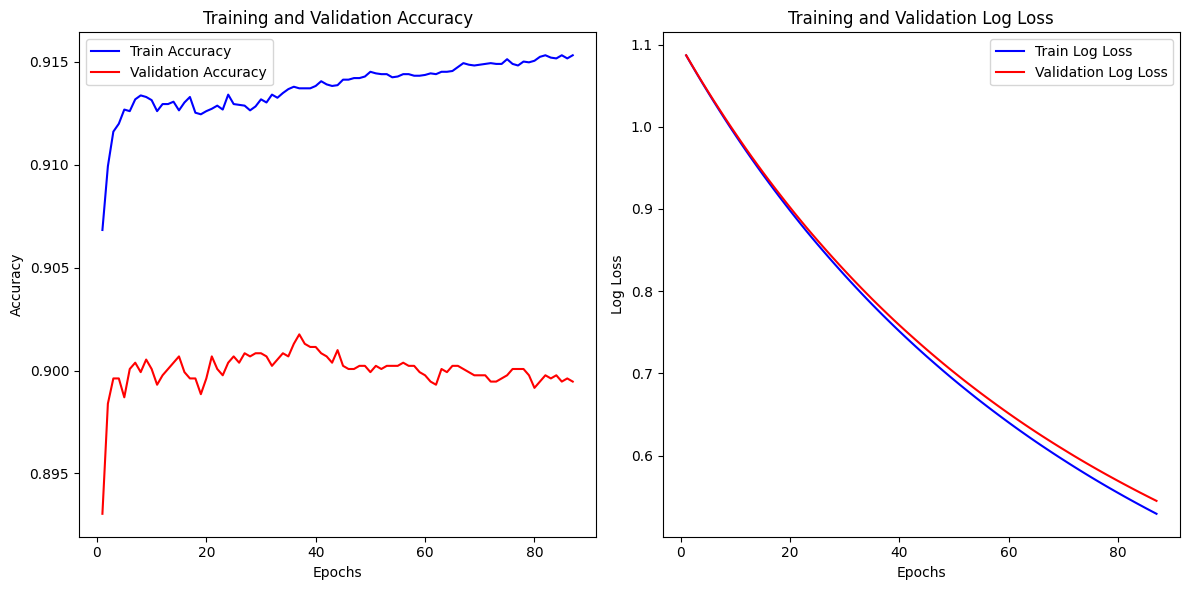

In [135]:
plot_xgboost_history(history_combined)

In [87]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Model parameters
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

models = {
    "Logistic Regression": (LogisticRegression(random_state=42), logistic_params),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), xgb_params)
}


# Dictionary to hold your data, assuming it's already split into training and validation sets
datasets = {
    "SNLI": (X_train_snli, y_train_snli, X_val_snli, y_val_snli),
    "MNLI Matched": (X_train_mnli_matched, y_train_mnli_matched, X_val_mnli_matched, y_val_mnli_matched),
    "MNLI Mismatched": (X_train_mnli_mismatched, y_train_mnli_mismatched, X_val_mnli_mismatched, y_val_mnli_mismatched),
    "ANLI Round 1": (X_train_anli_r1, y_train_anli_r1, X_val_anli_r1, y_val_anli_r1),
    "ANLI Round 2": (X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2),
    "ANLI Round 3": (X_train_anli_r3, y_train_anli_r3, X_val_anli_r3, y_val_anli_r3)
}



In [88]:
# Define the model training functions
def tune_and_train_model(model, X_train, y_train, param_grid, model_name, task_name):
    from sklearn.model_selection import GridSearchCV
    print(f"Starting hyperparameter tuning for {task_name} using {model_name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {task_name} using {model_name}: {grid_search.best_params_}")
    print(f"Best score for {task_name} using {model_name}: {grid_search.best_score_ * 100:.2f}%\n")
    
    return grid_search.best_estimator_

def evaluate_model(model, X_val, y_val, task_name):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy on {task_name}: {accuracy * 100:.2f}%")

In [159]:
# Loop through each dataset
for task_name, data in datasets.items():
    X_train, y_train, X_val, y_val = data
    print(f"Processing {task_name} dataset...")
    
    # Loop through each model type
    for model_name, (model, params) in models.items():
        print(f"Training {model_name} on {task_name}...")
        best_model = tune_and_train_model(model, X_train, y_train, params, model_name, task_name)
        evaluate_model(best_model, X_val, y_val, task_name)

Processing SNLI dataset...
Training Logistic Regression on SNLI...
Starting hyperparameter tuning for SNLI using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for SNLI using Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for SNLI using Logistic Regression: 92.70%

Accuracy on SNLI: 93.23%
Training XGBoost on SNLI...
Starting hyperparameter tuning for SNLI using XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for SNLI using XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best score for SNLI using XGBoost: 92.95%

Accuracy on SNLI: 92.98%
Processing MNLI Matched dataset...
Training Logistic Regression on MNLI Matched...
Starting hyperparameter tuning for MNLI Matched using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for MNLI Matched using Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for MNLI Matched using Logistic Regression: 91.72%

Accuracy on MNLI Matched: 92.15%
Training XGBoost on MNLI Matched...
Starting hyperparameter tuning for MNLI Matched using XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for MNLI Matched using XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best score for MNLI Matched using XGBoost: 91.93%

Accuracy on MNLI Matched: 91.90%
Processing MNLI Mismatched dataset...
Training Logistic Regression on MNLI Mismatched...
Starting hyperparameter tuning for MNLI Mismatched using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for MNLI Mismatched using Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for MNLI Mismatched using Logistic Regression: 91.86%

Accuracy on MNLI Mismatched: 91.87%
Training XGBoost on MNLI Mismatched...
Starting hyperparameter tuning for MNLI Mismatched using XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for MNLI Mismatched using XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best score for MNLI Mismatched using XGBoost: 91.88%

Accuracy on MNLI Mismatched: 91.61%
Processing ANLI Round 1 dataset...
Training Logistic Regression on ANLI Round 1...
Starting hyperparameter tuning for ANLI Round 1 using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for ANLI Round 1 using Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for ANLI Round 1 using Logistic Regression: 76.50%

Accuracy on ANLI Round 1: 72.50%
Training XGBoost on ANLI Round 1...
Starting hyperparameter tuning for ANLI Round 1 using XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for ANLI Round 1 using XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score for ANLI Round 1 using XGBoost: 77.62%

Accuracy on ANLI Round 1: 66.50%
Processing ANLI Round 2 dataset...
Training Logistic Regression on ANLI Round 2...
Starting hyperparameter tuning for ANLI Round 2 using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for ANLI Round 2 using Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for ANLI Round 2 using Logistic Regression: 66.38%

Accuracy on ANLI Round 2: 74.00%
Training XGBoost on ANLI Round 2...
Starting hyperparameter tuning for ANLI Round 2 using XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for ANLI Round 2 using XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best score for ANLI Round 2 using XGBoost: 66.12%

Accuracy on ANLI Round 2: 70.00%
Processing ANLI Round 3 dataset...
Training Logistic Regression on ANLI Round 3...
Starting hyperparameter tuning for ANLI Round 3 using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for ANLI Round 3 using Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for ANLI Round 3 using Logistic Regression: 65.42%

Accuracy on ANLI Round 3: 68.75%
Training XGBoost on ANLI Round 3...
Starting hyperparameter tuning for ANLI Round 3 using XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for ANLI Round 3 using XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best score for ANLI Round 3 using XGBoost: 67.60%

Accuracy on ANLI Round 3: 68.75%
